 # ESTADÍSTICA 2.  PRÁCTICA 2.
 ## Autor: Jesús Octavio Raboso.
 
Los enunciados del ejercicio aparecerán en negrita, cursiva y color azul. El resto de anotaciones (explicativas y personales) no seguirán ese estilo.

Cuando hablo de *resultados teóricos o analíticos* me refiero a los desarrollos vistos en teoría; a funciones creadas con duchos desarrollos que no hacen uso de métodos propios de `R` como pueden ser la función `lm()`.

* (24/11/2021) Envío por correo.

<font color='blue'>***Consideremos un sistema en el que existe una característica x y una variable dependiente y que se relacionan como y = a * x.***</font>

   
<font color='blue'>***Supongamos también que para cada valor fijo de x la medida y viene dada por una pdf gaussiana centrada en a * x y con sigma.***</font>


Tenemos un modelo en el que $y=f(x)=a\cdot x$ en el que $p(y|x)$ tiene la siguiente forma:
$$p(y|x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}\frac{(y-a\cdot x)^{2}}{\sigma^{2}}}$$
    
<font color='blue'>***Escribe una funcion de R que tome como input un vector aleatorio de N elementos de x que tome valores entre [0, 10], el factor a, y sigma; y genere el correspondiente vector y.***</font>

Se pide que los elementos del vector de input estén comprendidos en el intervalo [0,10], de modo que ponemos una restricción en la función. Si no se verifica, se para la ejecución.

In [1]:
my_model <- function(x, a, sigma){
     
    #
    # Model with one feature y = f(x) = a*x.
    # Generates points (x ,y) where y is normally distributed 
    # with mean = a*x (for each element in vector x), sigma = sigma
    #
    # @description Model y = f(x) = a*x.
    #
    # @param x numeric vector. Features vector. Independent variable.
    # @param a float. Relation between x abd output vector.
    # @param sigma float. Standard deviation.
    #
    # @return numeric vector. Model result. Dependent variable.
    #
    
    bool_vec <- x >= 0 & x <= 10
    if (any(bool_vec == FALSE)) {
        stop("Vector values must be in [0,10].")    
    }

    return(rnorm(x, mean = a * x, sd = sigma)) # R function are vectorized
}

<font color='blue'>***Una vez terminada la función genera el vector x con N = 100, y un vector y con a = 2 y sigma = 0.2. Pintalos en una grafica.***</font> 

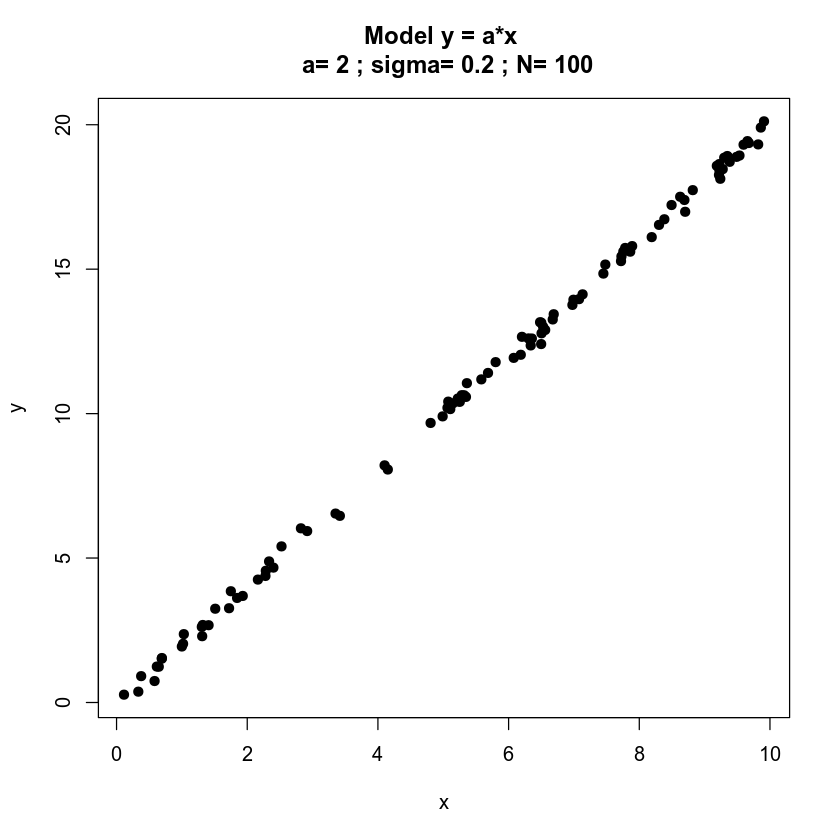

In [2]:
set.seed(21)                          # Ensure reproducible results

N <- 100                              # Sample size.
minimum <- 0                          # Minimum value. Left bound in interval (min, max).
maximum <- 10                         # Maximum value. Right bound in interval (min, max).
x <- runif(N, minimum, maximum)       # Random vector of legth N containg numbers in (minimum, maximum).

a <- 2                                # Parameter a.
sigma <- 0.2                          # Parameter sigma. Standard deviation.

y <- my_model(x = x, a = a, sigma = sigma)   # Invoke function. Create model.

plot(y ~ x, col = 'black', pch = 19,
    main = paste('Model y = a*x', '\n', 'a=', a, '; sigma=', sigma, '; N=', N))

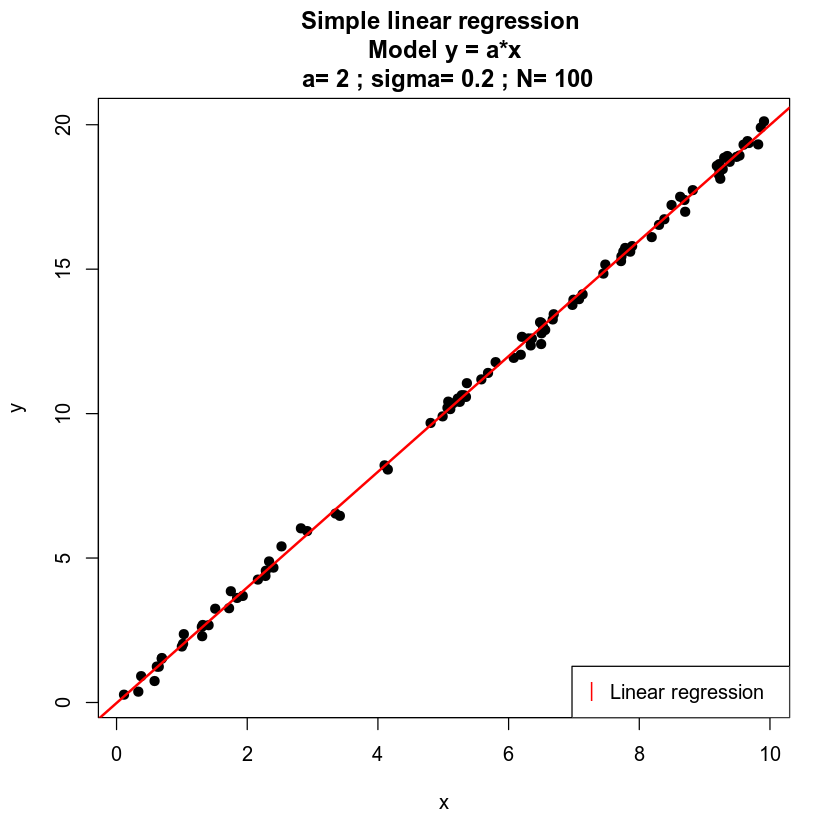

In [3]:
# Just in case. Simple linear regression.
plot(y ~ x, col = 'black', pch = 19,
     main = paste('Simple linear regression', '\n', 'Model y = a*x', '\n', 'a=', a, '; sigma=', sigma, '; N=', N))     # Plot 
abline(lm(y ~ x), col = 'red', lwd = 2) 
legend("bottomright", legend = "Linear regression", pch = "|", col = "red")# Linear regression

<font color='blue'>***Escribe una función en R a la que le pases un vector y dependiente, un vector x con la caracteristica, y un parametro a y te devuelva el valor de la loss function para ese valor del parámetro a.***</font>


**Para no confundir con el parámetro $a$ que marcaba la relación entre variables en el primer enunciado (<font color='blue'>y = a * x</font>), denotaré por $cp$ (cost parameter) al parámetro $a$ al que hace referencia el enunciado actual.**

Sé que no habría problema en crear una función en la que le pasemos un parámetro a, el intérprete de `R` lo sabría diferenciar, pero por no confundirme personalmente.


Dado un modelo lineal del tipo:
$$ y = f(x_{1},...,x_{M}) = \alpha_{0}+\alpha_{1}x_{1} + \alpha_{2}x_{2}  + ...+ \alpha_{M}x_{M},$$

podemos representarlo matricialmente como:

$$\begin{bmatrix}
y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(N)}
\end{bmatrix} = 
\begin{bmatrix} 
	1 & x_{1}^{(1)} & x_{2}^{(1)} & \dots & x_{M}^{(1)} \\
	1 & x_{1}^{(2)} & x_{2}^{(2)} & \dots & x_{M}^{(2)} \\
    \vdots & \vdots       & \vdots &  \vdots& \vdots  \\
	1 & x_{1}^{(N)} & x_{2}^{(N)} & \dots & x_{M}^{(N)} \\
	\end{bmatrix}
    \begin{bmatrix} 
	\alpha_{0}\\
	\alpha_{1}\\
    \vdots \\
    \alpha_{M}\\
	\end{bmatrix}
$$
es decir:
$$ y= X\alpha.$$

Empleando el cuadrado de la distancia euclídea como función de coste, esta resulta:
$$ \textit{Loss} = (y-X\alpha)^{T}(y-X\alpha).$$


**La cuestión es: ¿qué valores particulares $\hat{\alpha}$ de $\alpha$ minimizan la función de coste?**


In [4]:
loss <- function(X, y, cp){
    
    #
    # @description Cost function. Square of euclidean distance.
    #
    # @param X numeric array.  Dependent variable. 
    # @param y numeric vector. Independent variable
    # @param a float. Relation between x and y
    #
    # @return float. Loss function value.
    #
    
    return(as.numeric(t(y - X * cp) %*% (y - X * cp)))
}

<font color='blue'>***Llama a la función anterior con diferentes valores del parámetro a, y pinta la curva de la loss function en función de a. Comprueba visualmente que el mínimo está en la posición que nos esperamos.***</font>

En nuestro caso, $y=a\cdot x$, la representación matricial es la siguiente:

$$\begin{bmatrix}
y_{1} \\ y_{2} \\ \vdots \\ y_{M}
\end{bmatrix} = 
\begin{bmatrix} 
	x_{1}^{(1)}  \\
	x_{1}^{(2)}  \\
    \vdots   \\
	x_{1}^{(N)} \\
	\end{bmatrix}
   \cdot a
$$
es decir:
$$ y= a \cdot X.$$

En la generación del modelo `my_model` en el que las variables se relacionaben mediante $y=a\cdot x$, mantenemos el parámetro $a = 2$ que habíamos empleado en el apartado anterior. Lo que hacemos variar es el parámetro $cp$ que le pasamos a la función de coste.


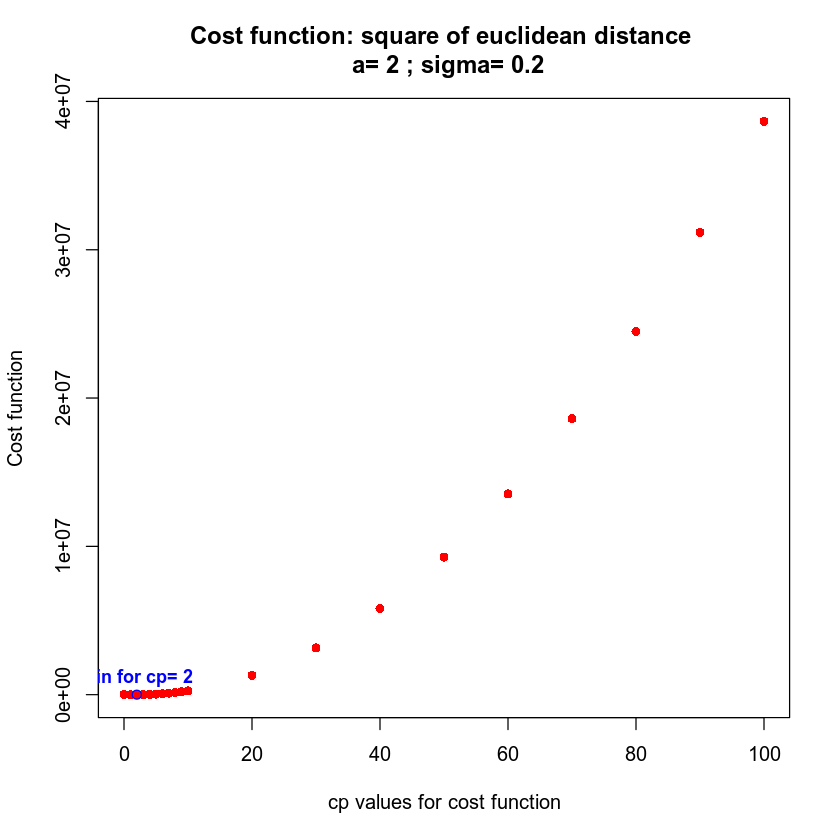

In [5]:
set.seed(22)                                                                        # Ensure reproducible results.

loss_params <- c(seq(from = 0, to = 10, by = 1), seq(from = 20, to = 100, by = 10)) # Parameters for cost function.
loss_vals <- c()                                                                    # Cost function values.
for (cp in loss_params){
    loss_vals <- c(loss_vals, loss(x, y, cp))                                       # Calculate loss function. 
}

plot(loss_params, loss_vals, 
     col  = 'red', 
     pch  = 16,
     xlab = 'cp values for cost function',
     ylab = 'Cost function',
     main = paste('Cost function: square of euclidean distance', '\n', 'a=', a, '; sigma=', sigma))


min_pos <- which.min(loss_vals)                                                     # First a considered is 0.
min_loss_vals <- min(loss_vals);
points(x = loss_params[min_pos] , y = min_loss_vals, col = 'blue')                 # Plot minimum
text(x = loss_params[min_pos], y = min_loss_vals, labels = paste('Min for cp=', loss_params[min_pos]),
     cex=0.9, font=2, pos=3, col = 'blue')

Podemos hacer zoom a la zona en la que se encuentra:

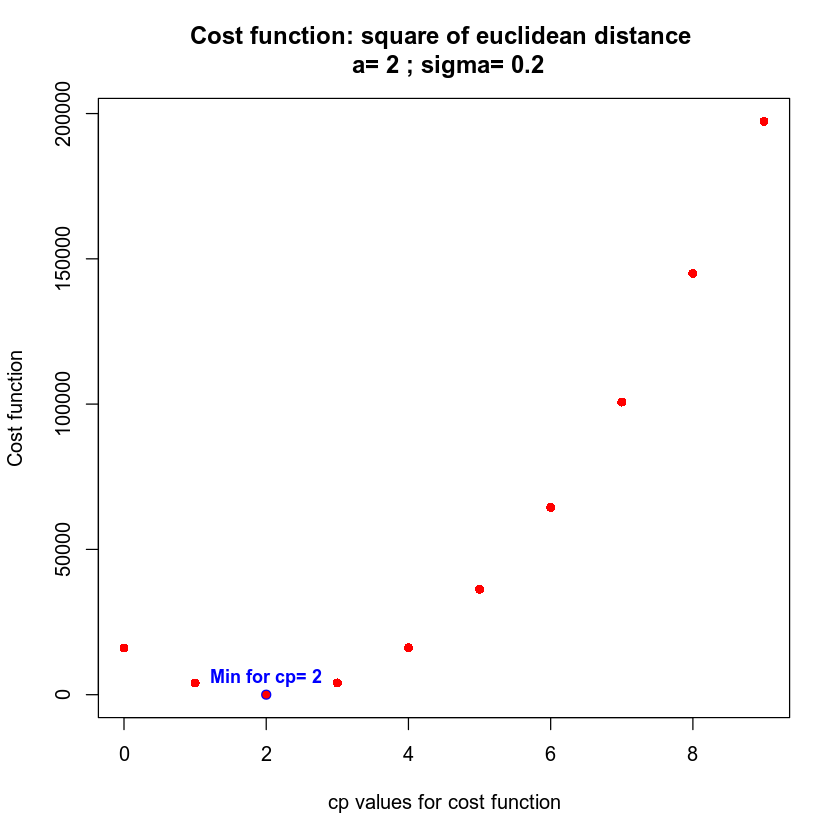

In [6]:
plot(loss_params[(1:10)], loss_vals[(1:10)], col  ='red', pch = 16,
     xlab = 'cp values for cost function',
     ylab = 'Cost function',
     main = paste('Cost function: square of euclidean distance', '\n', 'a=', a, '; sigma=', sigma))

points(x = loss_params[min_pos], y  = min_loss_vals, col = 'blue')
text(x =loss_params[min_pos], y = min_loss_vals, labels = paste('Min for cp=', loss_params[min_pos]),
     cex = 0.9, font = 2, pos = 3, col = 'blue')

Obtenemos el minimo para el valor del parámetro $cp = 2$  como era de esperar, pues cincide con el parámetro $a=2$ que hemos utilizado para generar el modelo. Dicho minimo vale:

In [7]:
min_loss_vals 

[1] 3.818389

¿Qué pasaria si empleasemos un mismo parámetro tanto en la generacion del modelo como en la función de coste? Es decir, ¿Qué pasaría si $a=cp$ siempre?

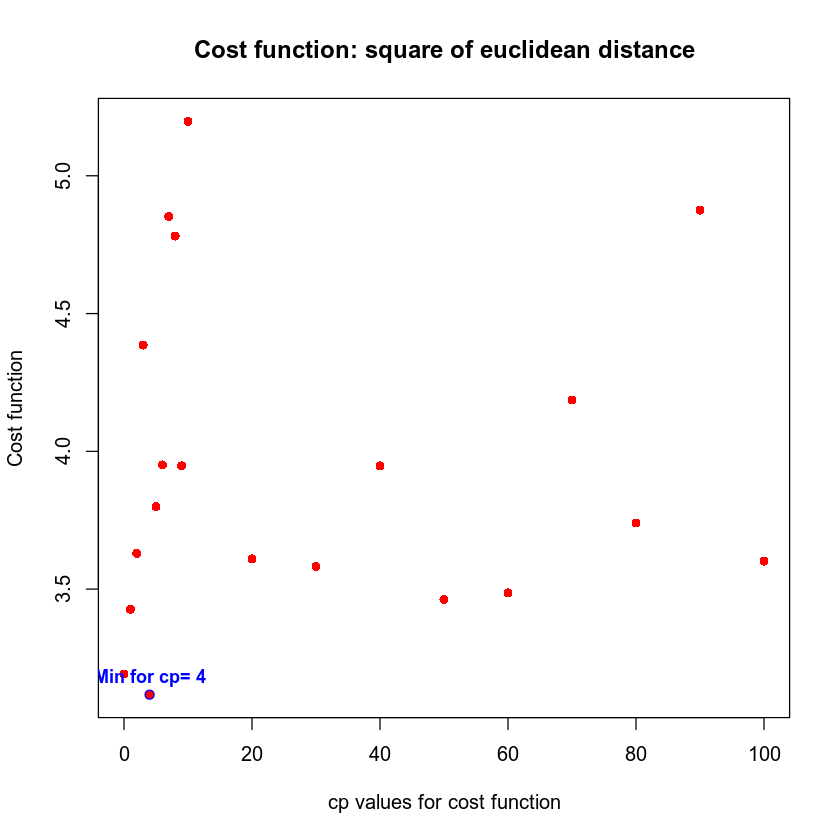

In [9]:
#set.seed(32)                                                                       # Ensure reproducible results.

loss_vals_2 <- c()                                                                  # Cost function values.
for (cp in loss_params){
    y <- my_model(x = x, a = cp, sigma = sigma)                                     # Invoke function. Create model.
    loss_vals_2 <- c(loss_vals_2, loss(x, y, cp))                                   # Calculate loss function. 
}

plot(x = loss_params, y = loss_vals_2, col = 'red', pch = 16,
    xlab = 'cp values for cost function',
    ylab = 'Cost function',
    main = 'Cost function: square of euclidean distance')


min_pos_2 <- which.min(loss_vals_2)                                                  # First a considered is 0.
min_loss_vals_2 <- min(loss_vals_2);
points(x = loss_params[min_pos_2] , y = min_loss_vals_2, col = 'blue')               # Plot minimum
text(x = loss_params[min_pos_2], y  = min_loss_vals_2, labels = paste('Min for cp=', loss_params[min_pos_2]),
     cex=0.9, font=2, pos=3, col = 'blue')

Observamos que los errores se mantienen acotados, mientras que en el caso anterior se disparaban.